# Assignment 2

Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes **assumptions** about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2    
1. train the models and evaluate accuracy. (with a training pipeline, described in the seminar: separate the data into *train, validation, and test*) 
1. Show which model is better.   
1. Write what assumptions were used, and why model exibits such behavior.  
1. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)  


Tasks:

1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance


! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.  
! if the training pipeline is not used, the task does not count.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def pipeline(model, X, y, params):
    print("Model: ", model)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)
    model.fit(X_train, y_train)
    print("Train accuracy: ", model.score(X_train, y_train))
    grid_search = GridSearchCV(model, cv=5, param_grid=params)
    grid_search.fit(X_train, y_train)
    print("Accuracy after validation: ", grid_search.best_score_)
    print("Test accuracy: ", grid_search.best_estimator_.score(X_test, y_test))

## 1. k-NN perfoms worse than logistic regression

1. модель knn лучше определяет классы, когда объекты одного класса находятся близко друг к другу.
2. в модели logistic regression наилучший результат будет достигаться для линейно разделимой выборки.

тогда, чтобы модель knn справилась хуже, чем LR, приведем пример, где расстояния между двумя классами меньше, чем между объектами одного класса.

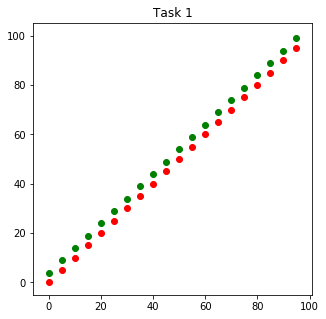

In [3]:
plt.figure(figsize=(5, 5))
plt.title('Task 1')

x1 = [(x, x) for x in range(0, 100, 5)]
x2 = [(x, z+4) for x, z in x1]

xs1 = np.array(x1)
xs2 = np.array(x2)
X = np.array(x1+x2)
y = np.array([0]*20 + [1]*20)

plt.scatter([i[0] for i in xs1], [i[1] for i in xs1], c='r')
plt.scatter([i[0] for i in xs2], [i[1] for i in xs2], c='g')

In [4]:
pipeline(LogisticRegression(solver='liblinear'), X, y, {'C':np.linspace(0.1,1,10)})

Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Train accuracy:  1.0
Accuracy after validation:  1.0
Test accuracy:  1.0


In [5]:
pipeline(KNeighborsClassifier(p=2), X, y, {'n_neighbors':np.arange(1,10)})

Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Train accuracy:  0.75
Accuracy after validation:  0.5357142857142857
Test accuracy:  0.3333333333333333


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Из результатов видно, что LR справился намного лучше, чем knn.

## 2.  logistic regression perfoms worse than k-NN

1. модель knn лучше определяет классы, когда объекты одного класса находятся близко друг к другу.
2. в модели logistic regression наилучший результат будет достигаться для линейно разделимой выборки.

тогда, чтобы LR справилась хуже, чем knn, приведем пример, где два класса линейно неразделимы.

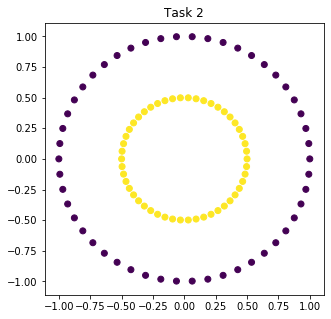

In [6]:
plt.figure(figsize=(5, 5))
plt.title('Task 2')

X, y = make_circles(n_samples=100, factor=0.5)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [7]:
pipeline(LogisticRegression(solver='liblinear'), X, y, {'C':np.linspace(0.1,1,10)})

Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Train accuracy:  0.5142857142857142
Accuracy after validation:  0.34285714285714286
Test accuracy:  0.4666666666666667


In [8]:
pipeline(KNeighborsClassifier(p=2), X, y, {'n_neighbors':np.arange(1,30)})

Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Train accuracy:  1.0
Accuracy after validation:  1.0
Test accuracy:  1.0


Из результатов видно, что knn справился намного лучше, чем LR.

## 3. k-NN with cosine distance perfoms better than k-NN with euclidean distance

1. модель knn с косинусной близостью лучше отделяет два класса, когда угол между векторами равен нулю и они совпадают. 
2. модель knn с евклидовым расстоянием опирается на расстояния между векторами.

тогда, чтобы knn с косинусной близостью справился лучше, чем knn с евклидовым расстоянием, построим для одного класса прямую, чтобы евклидово расстояние было равно нулю, а в другом классе рандомно разместим точки по графику.

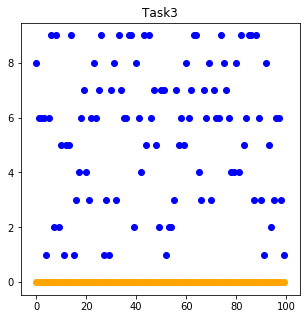

In [9]:
plt.figure(figsize=(5, 5))
plt.title('Task3')

x = np.arange(0, 100)

x1 = np.array([(x[i], 0) for i in range(0, 100)])
x2 = np.array([(x[i], np.random.randint(1, 10, 1)[0]) for i in range(0, 100)])

X = np.append(x1, x2, axis=0)
y = np.array([0 if i<100 else 1 for i in range(200)])

plt.scatter([i[0] for i in x1],[i[1] for i in x1], c='orange')
plt.scatter([i[0] for i in x2], [i[1] for i in x2], c='blue')

In [10]:
pipeline(KNeighborsClassifier(metric="euclidean"), X, y, {'n_neighbors': range(1, 30)})

Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Train accuracy:  0.9071428571428571
Accuracy after validation:  0.9
Test accuracy:  0.85


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [11]:
pipeline(KNeighborsClassifier(metric="cosine"), X, y, {'n_neighbors': range(1, 30)})

Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Train accuracy:  0.9928571428571429
Accuracy after validation:  0.9928571428571429
Test accuracy:  1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Из результатов видно, что knn с косинусной близостью справился немного лучше, чем knn с евклидовым расстоянием.